# 2. Image Enhancement

## Table of Contents
1. [Libraries](#libraries)
2. [Histogram Equalization](#hist)
3. [Denoising with Filters](#denoising)
4. [Challenge](#challenge)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage import exposure
import skimage
from scipy.ndimage.filters import gaussian_filter as gauss
from scipy.ndimage.filters import median_filter as med
import cv2

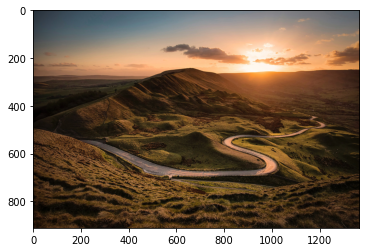

In [ ]:
original_image = Image.open('/content/image.jpg')
plt.imshow(original_image)
type(original_image)

# Save the image
np.save('/content/image.npy', original_image)

#Load the image
original_image = np.load('/content/image.npy')

## Histogram Equalization<a class="anchor" id="hist" ></a>

Let's look at the distribution of pixel values in the image. 

Ideally, the image should have relatively even distribution of values, indicating good contrast and making it easier to extract analytical information.

An easy way to check this is to plot a histogram.

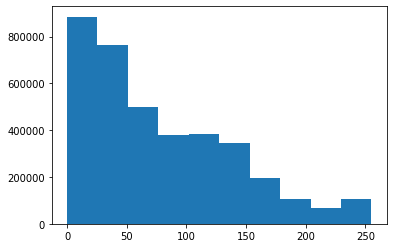

In [ ]:
# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.hist(original_image.ravel())
plt.show()

Another useful way to visualize the statistics of an image is as a cumulative distribution function (CDF) plot. Which shows the cumulative pixel intensity frequencies from 0 to 255.

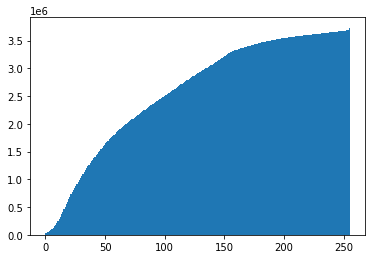

In [ ]:
plt.hist(original_image.ravel(), bins=255, cumulative=True)
plt.show()

The histogram and CDF for our image show pretty uneven distribution - there's a lot of contrast in the image. Ideally we should equalize the values in the images we want to analyse to try to make our images more consistent in terms of the shapes they contain irrespective of light levels.

Histogram equalization is often used to improve the statistics of images. In simple terms, the histogram equalization algorithm attempts to adjust the pixel values in the image to create a more uniform distribution. The code in the cell below uses the  **exposure.equalize_hist** method from the **skimage** package to equalize the image.  

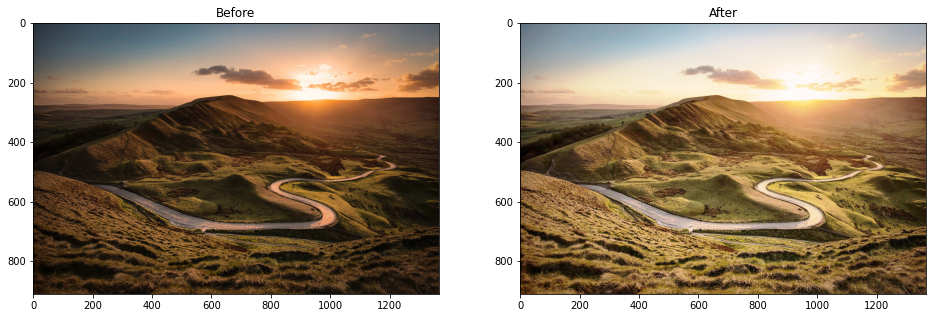

In [ ]:
original_image_eq = exposure.equalize_hist(original_image)

fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(original_image_eq)
a.set_title('After')

plt.show()

As with most image operations, there's more than one way to do this. For example, you could also use the **PIL.ImgOps.equalize** method:

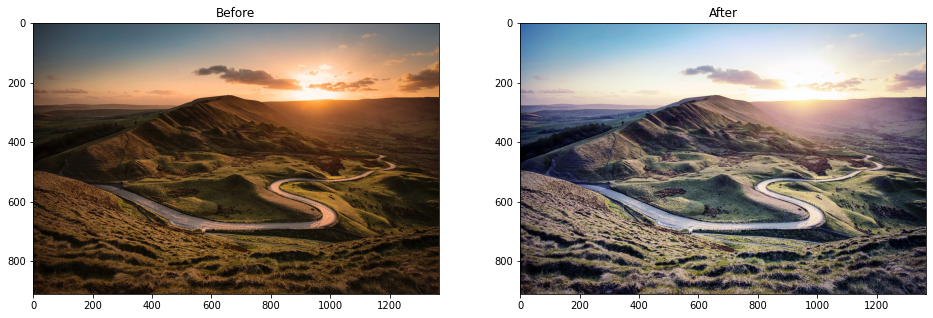

In [ ]:

# Equalize the image - but we need to convert the numpy array back to the PIL image format
image_PIL_eq = ImageOps.equalize(Image.fromarray(original_image))

# Display using matplotlib

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(image_PIL_eq)
a.set_title('After')

plt.show()

Now let's see what that's done to the histogram and CDF plots:

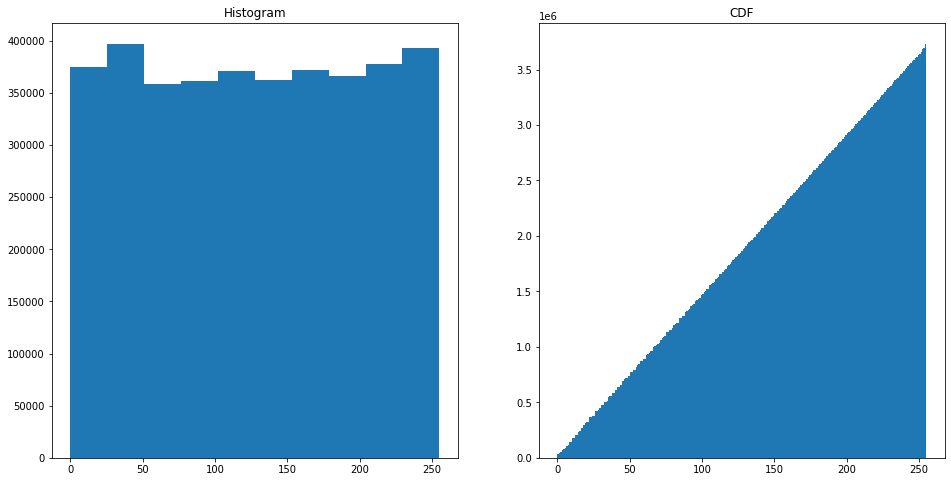

In [ ]:
# Display histograms
img_eq = np.array(image_PIL_eq)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.hist(img_eq.ravel())
a.set_title('Histogram')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.hist(img_eq.ravel(), bins=255, cumulative=True)
a.set_title('CDF')

plt.show()

The pixel intensities are more evenly distributed in the equalized image. In particular, the cumulative density shows a straight diagonal cumulation; which is a good sign that the pixel intensity values have been equalized.

## Denoising with Filters <a class="anchor" id="denoising" ></a>

Often images need to be cleaned up to remove "salt and pepper" noise.

### Add Some Random Noise
Let's add some random noise to our image - such as you might see in a photograph taken in low light or at a low resolution.

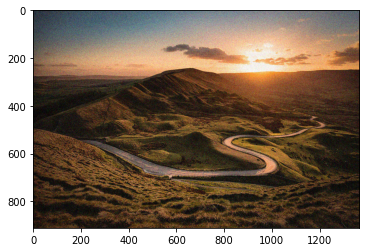

In [ ]:
img_n = skimage.util.random_noise(original_image)
plt.imshow(img_n)

### Using a Gaussian Filter
A Gaussian filter applies a weighted average (mean) value for pixels based on the pixels that surround them.

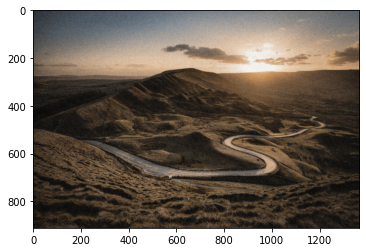

In [ ]:
img3_gauss = gauss(img_n, sigma=1)   
plt.imshow(img3_gauss)

### Using a Median Filter
The Gaussian filter results in a blurred image, which may actually be better for feature extraction as it makes it easier to find contrasting areas. If it's too blurred, we could try a median filter, which as the name suggests applies the median value to pixels based on the pixels around them.

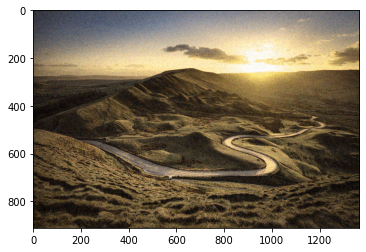

In [ ]:
img_med = med(img_n, size=2)
plt.imshow(img_med)

## Challenge <a class="anchor" id="challenge" ></a>

Now, try solving this challenge, you must equalize different windows of the same image in a splitted way.

In [ ]:
!pip install image-slicer

In [ ]:
from image_slicer import slice

n = 4
slice('/content/image.jpg', n)

(<Tile #1 - image_01_01.png>,
 <Tile #2 - image_01_02.png>,
 <Tile #3 - image_02_01.png>,
 <Tile #4 - image_02_02.png>)

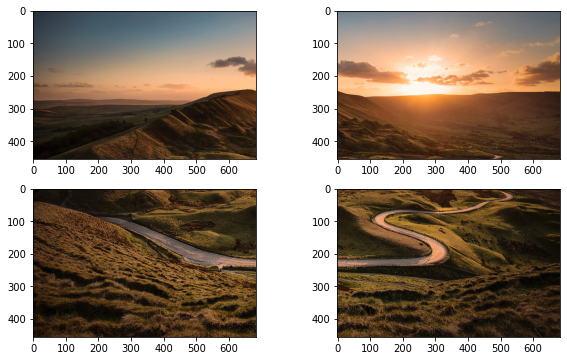

In [ ]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
img1 = Image.open(f'/content/image_01_01.png')
plt.imshow(img1)

plt.subplot(2,2,2)
img2 = Image.open(f'/content/image_01_02.png')
plt.imshow(img2)

plt.subplot(2,2,3)
img3 = Image.open(f'/content/image_02_01.png')
plt.imshow(img3)

plt.subplot(2,2,4)
img4 = Image.open(f'/content/image_02_02.png')
plt.imshow(img4)

plt.show()

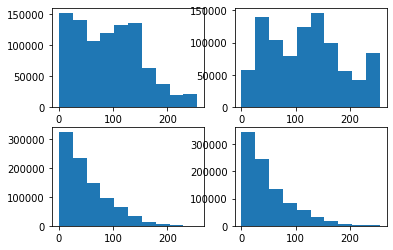

In [ ]:
# Save the image
np.save('/content/image_01_01.npy', img1)
np.save('/content/image_01_02.npy', img2)
np.save('/content/image_02_01.npy', img3)
np.save('/content/image_02_02.npy', img4)

#Load the image
original_image1 = np.load('/content/image_01_01.npy')
original_image2 = np.load('/content/image_01_02.npy')
original_image3 = np.load('/content/image_02_01.npy')
original_image4 = np.load('/content/image_02_02.npy')

# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.subplot(2,2,1)
plt.hist(original_image1.ravel())
plt.subplot(2,2,2)
plt.hist(original_image2.ravel())
plt.subplot(2,2,3)
plt.hist(original_image3.ravel())
plt.subplot(2,2,4)
plt.hist(original_image4.ravel())
plt.show()

/usr/local/lib/python3.8/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


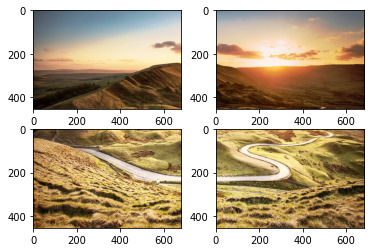

In [ ]:
original_image_eq1 = exposure.equalize_hist(original_image1)
original_image_eq2 = exposure.equalize_hist(original_image2)
original_image_eq3 = exposure.equalize_hist(original_image3)
original_image_eq4 = exposure.equalize_hist(original_image4)

# Subplot for original image
plt.subplot(2,2,1)
imgplot = plt.imshow(original_image_eq1)
plt.subplot(2,2,2)
imgplot = plt.imshow(original_image_eq2)
plt.subplot(2,2,3)
imgplot = plt.imshow(original_image_eq3)
plt.subplot(2,2,4)
imgplot = plt.imshow(original_image_eq4)


plt.show()

<ipython-input-48-3d8fbc785cf5>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  a=fig.add_subplot(1,2,2)


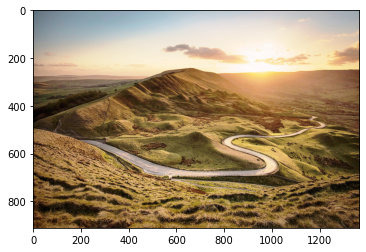

In [ ]:
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(original_image_eq)
a.set_title('After')

plt.show()

Investiga e implementa el método tile-based histogram equalization. En estos métodos, la imagen se particiona en diferentes ventanas (i.e. mosaicos) y los histogramas se calculan de forma independiente, aplicando la corrección sobre cada ventana. Existe un compromiso entre el tamaño de la ventana y la complejidad computacional, por lo cual es más complejo que el método simple. Implementa esta versión y realiza algunas pruebas variando el tamaño de la ventana. Otro inconveniente es que se puede observar posibles diferencias entre los el contraste de los bloques, ¿cómo podría mejorarse?

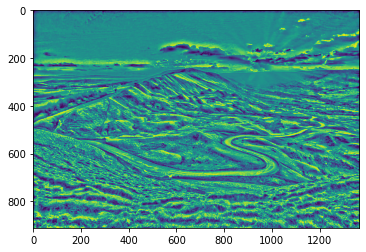

In [39]:
#Define el algoritmo para Adaptive Histogram Equalization.
def AHE(im, wsz):    
    h, w = im.shape
    out = np.zeros(im.shape) # Declare output variable
    im = np.pad(im.copy(), ((wsz//2, wsz//2), (wsz//2, wsz//2)), mode = 'reflect')
    for x in range(wsz//2, h + wsz//2):
        for y in range(wsz//2, w + wsz//2):
            blk = im[x-wsz//2:x+wsz//2, y-wsz//2:y+wsz//2]
            rank = np.sum(im[x, y] > blk)
            out[x - wsz//2, y - wsz//2] = rank * 255 / wsz**2
    return out

import cv2

im = cv2.imread('/content/image.jpg')
#Pasamos a blanco y negro
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#Con tamaño de ventana de 50
plt.imshow(AHE(gray,50))

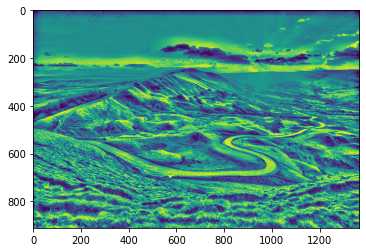

In [ ]:

plt.imshow(AHE(gray,100))

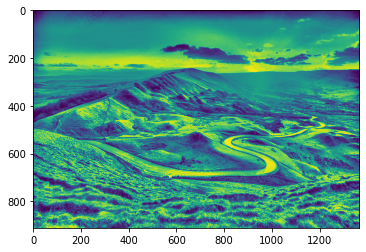

In [ ]:
#Con tamaño de ventana de 200
plt.imshow(AHE(gray,200))

Como observamos, a mayor ventana mejor definicion, pero si al contraste es muy similar en esas ventanas (digamos la de 50) el ruido se amplifica. Por eso se tienen los SWAHE y CLAHE.

Investiga e implementa un método sencillo del Sliding Window Adaptive Histogram Equalization (SWAHE) y compara algunas imágenes con diferentes tipos de imágenes.

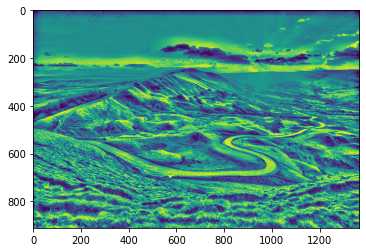

In [34]:
def SWAHE(im, wsz):    
    h, w = im.shape
    out = np.zeros(im.shape) # Declare output variable
    im = np.pad(im.copy(), ((wsz, wsz), (wsz, wsz)), mode = 'reflect')
    for x in range(wsz, h + wsz):
        for y in range(wsz, w + wsz):
            blk = im[x-wsz:x+wsz, y-wsz:y+wsz]
            rank = np.sum(im[x, y] > blk)
            out[x - wsz, y - wsz] = rank * 255 / wsz
    return out

im = cv2.imread('/content/image.jpg')
#Pasamos a blanco y negro
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#Con tamaño de ventana de 50
plt.imshow(SWAHE(gray,50))

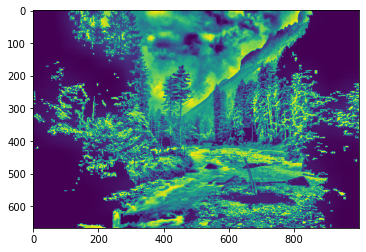

In [35]:
im = cv2.imread('/content/image2.jpg')
#Pasamos a blanco y negro
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#Con tamaño de ventana de 50
plt.imshow(SWAHE(gray,50))

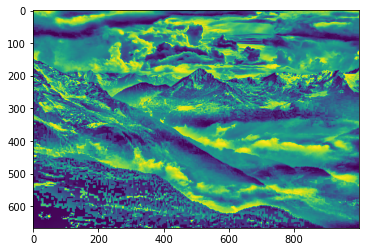

In [36]:
im = cv2.imread('/content/image3.jpg')
#Pasamos a blanco y negro
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#Con tamaño de ventana de 50
plt.imshow(SWAHE(gray,50))

Investiga cómo funciona el algoritmo CLAHE (contrast limited adaptive histogram equalization) y realiza una implementación (puede ser usando la implementación de OpenCV). Prueba sobre diferentes tipos de imágenes y compara con el método de ecualización de histogramas básico. Provee una breve descripción del método a partir de una  investigación bibliográfica.

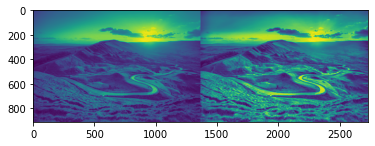

In [38]:
# Imagen en blanco y negro
img = cv2.imread('/content/image.jpg',0)

# Crea CLAHE con OpenCV
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
out = clahe.apply(img)

# Display the images side by side using cv2.hconcat
out1 = cv2.hconcat([img,out])
plt.imshow(out1)

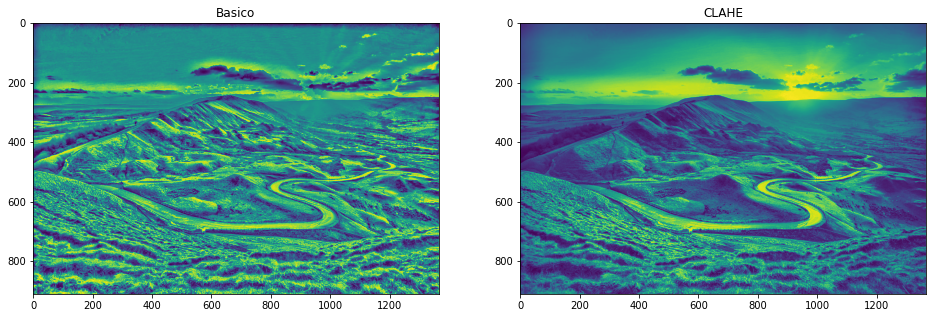

In [43]:
out2=AHE(gray,75)
fig = plt.figure(figsize=(16, 8))

#Basico
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(out2)
a.set_title('Basico')

#CLAHE
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(out)
a.set_title('CLAHE')

plt.show()

Como observamos con el histograma basico, existe cierto ruido que llega a ser amplificado debido a las similitudes de contrastes que se tienen en los mosaicos. Lo que el CLAHE intenta evitar es ese ruido mediante una noramlización del contraste durante la etapa del histograma. De esta manera, al limitar ese valor, podemos evitar la amplificación del ruido de la imagen.